In [1]:
from glob import glob
import sys
import getpass
import os
# import psutil
from os.path import join, dirname
from os.path import getsize
import pickle
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

# import nilearn.masking
from nilearn import plotting as nplt
from nilearn import image as niimg
import nilearn.decoding

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

/usr/local/anaconda3/envs/sampark/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
GA = mydef.GA()

Google Drive is detected!


## Visual areas and DMN Core

In [3]:
GA.__init__()
GA.load_fan()

Google Drive is detected!


In [4]:
## DMN regions
module_names = ['Core']

for name in module_names:
    temp = glob(join(GA.dir_dmn, name+'_*.nii'))
    for path in temp:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)

## yeo_17network == 1
dt = pd.DataFrame()
for nn in [1]:
    dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
for idx in dt.index:
    nn = dt.loc[idx,'label']
    region = dt.loc[idx,'region']
    GA.roi_imgs[region] = GA.fan_imgs[str(nn)]

GA.roi_imgs.keys()

dict_keys(['Core_PCC_r', 'Core_aMPFC_l', 'Core_PCC_l', 'Core_aMPFC_r', 'FuG_L_3_2', 'FuG_R_3_2', 'MVOcC_L_5_1', 'MVOcC_R_5_1', 'MVOcC_L_5_3', 'MVOcC_R_5_3', 'MVOcC_R_5_4', 'LOcC_L_4_1', 'LOcC_R_4_1', 'LOcC_L_4_3', 'LOcC_R_4_3', 'LOcC_L_4_4', 'LOcC_R_4_4', 'LOcC_L_2_2'])

### *calculate task-related networks (run once)

In [5]:
GA.make_wit_functional_correl(GA.roi_imgs)

,subj,visit,mapping,run,roiA,roiB,Pearson_r,pval
0,01,early,practice,r01,Core_PCC_l,Core_PCC_r,0.839912,1.218948e-292
1,01,early,practice,r01,Core_PCC_l,Core_aMPFC_l,0.606455,4.688236e-111
2,01,early,practice,r01,Core_PCC_l,Core_aMPFC_r,0.407164,5.131987e-45
3,01,early,practice,r01,Core_PCC_l,FuG_L_3_2,-0.014585,6.295687e-01
4,01,early,practice,r01,Core_PCC_l,FuG_R_3_2,0.013888,6.460383e-01
...,...,...,...,...,...,...,...,...
55075,44,late,unpractice,r06,MVOcC_L_5_3,MVOcC_R_5_3,0.198314,3.501410e-11
55076,44,late,unpractice,r06,MVOcC_L_5_3,MVOcC_R_5_4,0.025577,3.976033e-01
55077,44,late,unpractice,r06,MVOcC_R_5_1,MVOcC_R_5_3,0.810994,6.107964e-257
55078,44,late,unpractice,r06,MVOcC_R_5_1,MVOcC_R_5_4,0.613057,4.183435e-114


### save the result

In [6]:
GA.save_pkl(data=GA.wit_functional_correl, suffix='bp_demean.errts_correl.MO.RO.Yeo1-Core')

### load the result

In [5]:
GA.show_pkl_list(location=GA.dir_script, word='correl')

,name,identity
0,20210628_bp_demean.errts_correl.MO.RO.Yeo1-Cor...,a
1,20210517_func_correl.Core-Yeo1.pkl,b
2,20210531_errts_correl.Yeo1s-Cores.pkl,c
3,20210618_errts_correl.MO.RO.Yeo1s-Cores.pkl,d
4,20210525_func_correl.Yeo1s-Cores.pkl,e


In [3]:
GA.wit_functional_correl = GA.load_pkl(fname='20210628_bp_demean.errts_correl.MO.RO.Yeo1-Core.pkl')
GA.wit_functional_correl

,subj,visit,mapping,run,roiA,roiB,Pearson_r,pval
0,01,early,practice,r01,Core_PCC_l,Core_PCC_r,0.839912,1.218948e-292
1,01,early,practice,r01,Core_PCC_l,Core_aMPFC_l,0.606455,4.688236e-111
2,01,early,practice,r01,Core_PCC_l,Core_aMPFC_r,0.407164,5.131987e-45
3,01,early,practice,r01,Core_PCC_l,FuG_L_3_2,-0.014585,6.295687e-01
4,01,early,practice,r01,Core_PCC_l,FuG_R_3_2,0.013888,6.460383e-01
...,...,...,...,...,...,...,...,...
55075,44,late,unpractice,r06,MVOcC_L_5_3,MVOcC_R_5_3,0.198314,3.501410e-11
55076,44,late,unpractice,r06,MVOcC_L_5_3,MVOcC_R_5_4,0.025577,3.976033e-01
55077,44,late,unpractice,r06,MVOcC_R_5_1,MVOcC_R_5_3,0.810994,6.107964e-257
55078,44,late,unpractice,r06,MVOcC_R_5_1,MVOcC_R_5_4,0.613057,4.183435e-114


In [4]:
df = GA.wit_functional_correl.groupby(['subj','visit','mapping','roiA','roiB']).mean()
del df['pval']
df

Pearson_r
subj visit mapping    roiA        roiB                   
01   early practice   Core_PCC_l  Core_PCC_r     0.745218
                                  Core_aMPFC_l   0.511250
                                  Core_aMPFC_r   0.280309
                                  FuG_L_3_2      0.114958
                                  FuG_R_3_2      0.156355
...                                                   ...
44   late  unpractice MVOcC_L_5_3 MVOcC_R_5_3    0.278802
                                  MVOcC_R_5_4    0.054799
                      MVOcC_R_5_1 MVOcC_R_5_3    0.750482
                                  MVOcC_R_5_4    0.512089
                      MVOcC_R_5_3 MVOcC_R_5_4    0.613282

[18360 rows x 1 columns]

In [5]:
sorted_rois = sorted(set(list(GA.wit_functional_correl.roiA.unique())+list(GA.wit_functional_correl.roiB.unique())))

In [6]:
## group the indices by network
group = [1*(i>=4) for i, _ in enumerate(sorted_rois)]
nn = group[-1]+1  ## A number of networks
group

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### *functional connectivity matrices (run once)

In [13]:
os.makedirs(join(GA.dir_script,'matrices'), exist_ok=True)

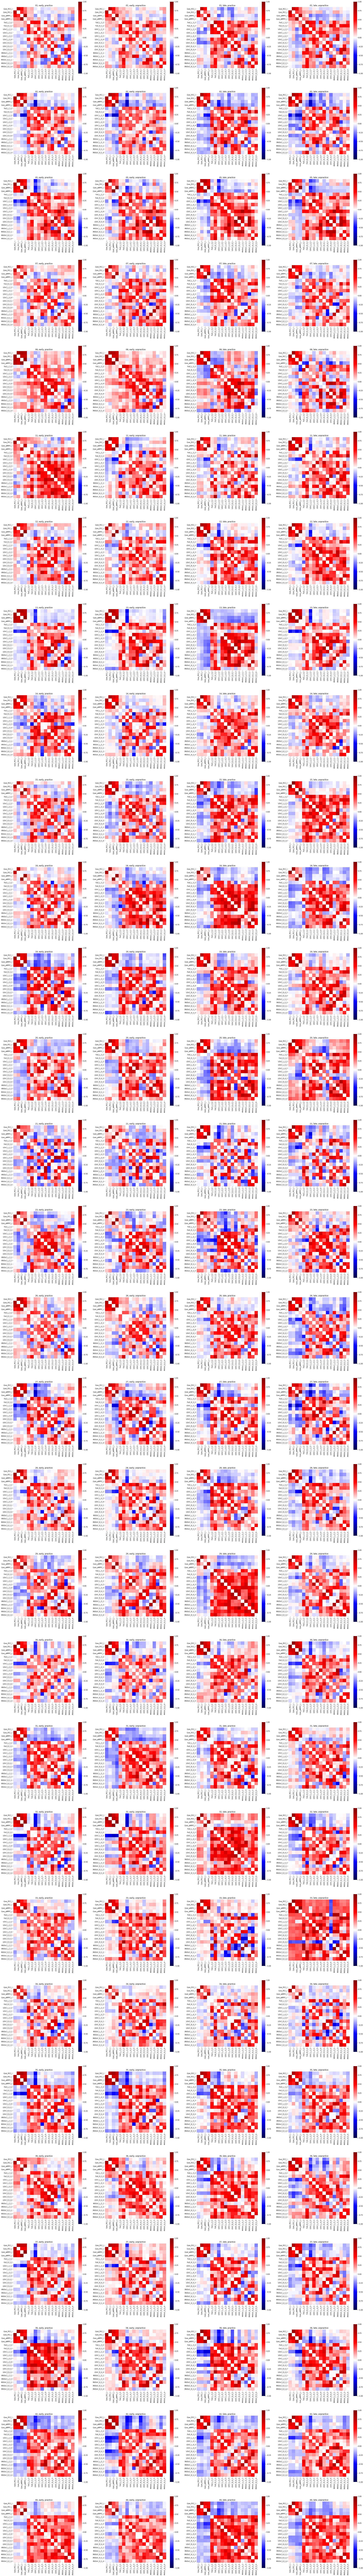

In [35]:
subjs = GA.list_subj
fig, axes = plt.subplots(nrows=len(subjs), ncols=4, figsize=(40, len(subjs)*10))
## initializing a group matrix
df_Gmat = {}
for visit in ['early', 'late']:
    for mapping in ['practice', 'unpractice']:
        df_Gmat[visit,mapping] = pd.DataFrame(np.zeros((len(sorted_rois),len(sorted_rois))), columns=sorted_rois, index=sorted_rois)
for i, subj in enumerate(subjs):
    print(subj, end='\r')
    for j, visit in enumerate(['early', 'late']):
        for k, mapping in enumerate(['practice', 'unpractice']):
            ## initializing a matrix
            df_mat = pd.DataFrame(np.zeros((len(sorted_rois),len(sorted_rois))), columns=sorted_rois, index=sorted_rois)
            ## fill the individual matrix with their proper elements
            for a, roiA in enumerate(sorted_rois):
                for t, roiB in enumerate(sorted_rois[a+1:]):
                    b = t+a+1
                    df_mat.loc[roiA][roiB] = df.loc[subj,visit,mapping,roiA,roiB]['Pearson_r']
                    df_mat.loc[roiB][roiA] = df_mat.loc[roiA][roiB]
            ## append df_mat to the group matrix
            df_Gmat[visit,mapping] += df_mat
            ## plot matrices by an individual subject
            ax = sns.heatmap(df_mat
                             , square=True, cmap='seismic', cbar=True
#                              , robust=True
                             , vmin=-1., vmax=1.
                             , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axes[i][2*j+k])
            ax.set_title('%s, %s, %s'%(subj, visit, mapping))
# fig.savefig(fname=join(GA.dir_script,'matrices','%s_DMN_core-Yeo1_individual.MO.RO.png'%GA.today))

In [36]:
## divide by a number of subjects to obtain the average value
for visit in ['early', 'late']:
    for mapping in ['practice', 'unpractice']:
        for roiA in sorted_rois:
            for roiB in sorted_rois:
                df_Gmat[visit,mapping].loc[roiA,roiB] /= 30

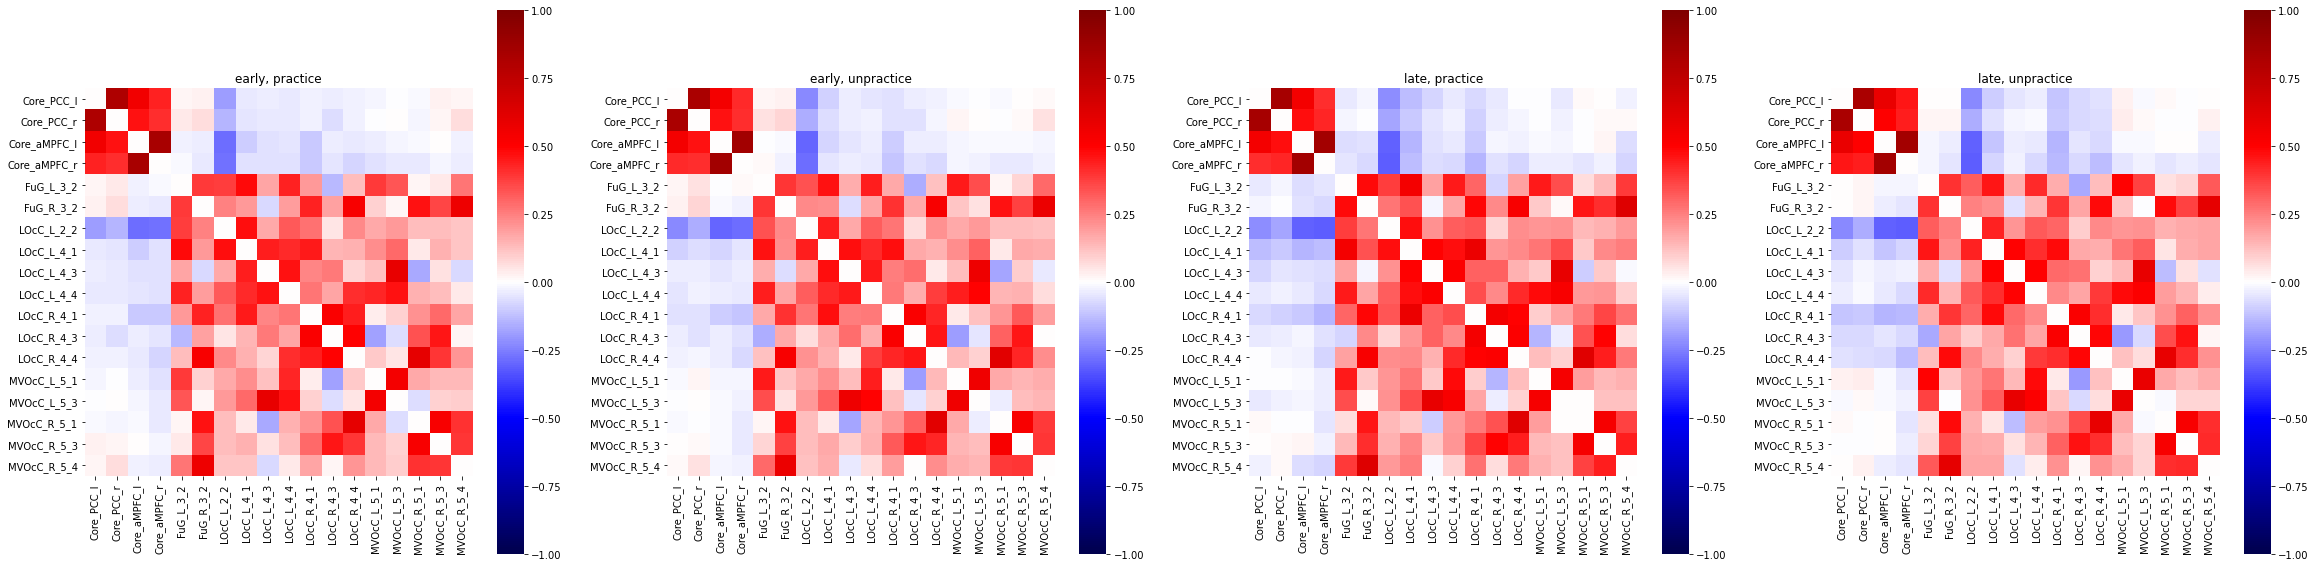

In [37]:
## plot group 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(40, 10))
for i, visit in enumerate(['early', 'late']):
    for j, mapping in enumerate(['practice', 'unpractice']):
        ax = sns.heatmap(df_Gmat[visit,mapping]
                         , square=True, cmap='seismic', cbar=True
        #                  , robust=True
                         , vmin=-1., vmax=1.
                         , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axes[2*i+j])
        ax.set_title('%s, %s'%(visit, mapping))

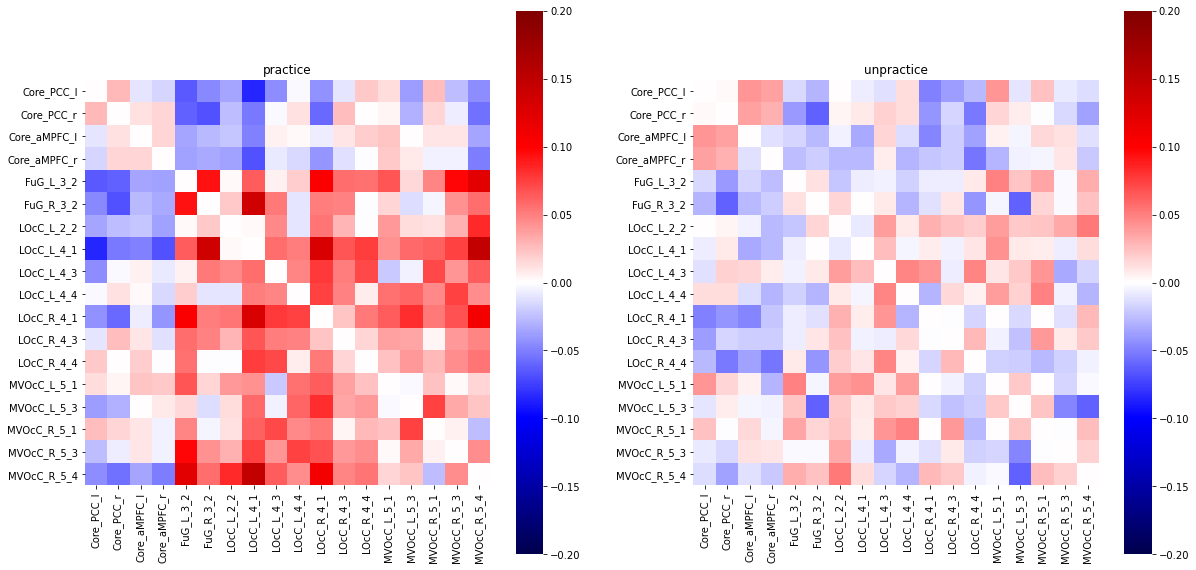

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
for j, mapping in enumerate(['practice', 'unpractice']):
    ax = sns.heatmap(df_Gmat['late',mapping]-df_Gmat['early',mapping]
                     , square=True, cmap='seismic', cbar=True
    #                  , robust=True
                     , vmin=-.2, vmax=.2
                     , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axes[j])
    ax.set_title('%s'%(mapping))

### Recruitment

In [10]:
mapping = 'practice'
intg = []
for subj in GA.list_subj:
    intstr_e = GA.calc_interaction_strength(subj, 'early', mapping, group)
    intstr_l = GA.calc_interaction_strength(subj, 'late', mapping, group)
    res = intstr_l[0,1]-intstr_e[0,1]
    print('%s : %.5f - %.5f = %.5f'%(subj,intstr_l[0,1],intstr_e[0,1],res))
    intg.append(res)

01 : -0.17740 - -0.05372 = -0.12368
02 : -0.36145 - -0.22563 = -0.13582
05 : -0.18088 - -0.16284 = -0.01804
07 : -0.19977 - 0.10682 = -0.30659
08 : 0.03920 - 0.17275 = -0.13354
11 : -0.02353 - 0.11739 = -0.14092
12 : -0.05693 - -0.00739 = -0.04954
13 : -0.32081 - -0.19313 = -0.12767
14 : -0.01535 - -0.06095 = 0.04560
15 : -0.30075 - -0.02209 = -0.27866
18 : -0.23341 - 0.08214 = -0.31555
19 : -0.03494 - -0.33673 = 0.30179
20 : -0.24993 - -0.19253 = -0.05740
21 : -0.24223 - -0.20606 = -0.03617
23 : -0.10261 - -0.23744 = 0.13483
26 : -0.09106 - 0.12687 = -0.21793
27 : -0.19545 - -0.25583 = 0.06038
28 : -0.27659 - 0.00628 = -0.28288
29 : -0.27398 - -0.17617 = -0.09782
30 : 0.02273 - -0.09623 = 0.11896
31 : -0.13963 - -0.32741 = 0.18778
32 : 0.25284 - -0.20437 = 0.45720
33 : 0.15486 - 0.04270 = 0.11216
34 : 0.01125 - -0.06413 = 0.07538
35 : -0.10680 - -0.24544 = 0.13864
36 : -0.13432 - 0.13402 = -0.26833
37 : -0.18356 - -0.19076 = 0.00719
38 : -0.27747 - -0.20373 = -0.07374
42 : -0.33739 - 

### plot

In [11]:
X = intg

In [12]:
Y = GA.del_RewardRate

Text(0.5, 1.0, 'r=-0.2443 (p=0.193)')

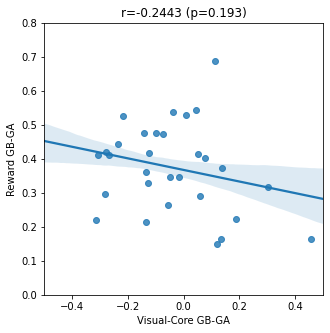

In [13]:
fig = plt.figure(figsize=(5, 5))
plt.xlim(-0.5, 0.5)
plt.ylim(-0., 0.8)
sns.regplot(x=X, y=Y, ci=68, truncate=False)
plt.ylabel('Reward GB-GA')
plt.xlabel('Visual-Core GB-GA')
plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [14]:
## Lower-Tailed t-Test
scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-1.1866123402961917, pvalue=0.12250546315607841)

## Fan280

In [3]:
GA.__init__()
GA.load_fan()

Google Drive is detected!


In [10]:
## make full mask
fname = join(GA.dir_mask,'fan280','fan.roi.GA.001.nii.gz')
fmask = nilearn.image.load_img(fname)
temp = nilearn.image.math_img(img1=fmask, formula='img1 * 0.')
for region, img in GA.fan_imgs.items():
    temp = nilearn.image.math_img(img1=temp, img2=img, formula='img1 + img2')
fmask = temp

In [11]:
np.sum(temp.get_fdata())

66189.0

In [ ]:
GA.save_pkl(data=GA.wit_functional_correl, suffix='bp_demean.errts_correl.MO.RO.Fan280')